# Final Project
# Kayelin Santa Elena

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from plotnine import *
import statsmodels.api as sm
import numpy as np

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #model evaluation

from sklearn.model_selection import KFold # k-fold cv

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [8]:
data = pd.read_csv("/Users/kksizzle/Desktop/CPSC 392/project_392/all_seasons.csv")

In [9]:
data.replace(['Undrafted'], [0], inplace=True)

In [81]:
data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


# Question 1: 
## What factors are most important when its comes to scoring points? Is it a player's height, weight, or their stats?

The reason why I changed the original question, "What is the average number of rebounds given a player’s height and weight?", is because there are more factors to getting a rebound than a players height a weight. Also, to really help find appropriate future players I believe the topic of the question should be about points, not rebounds.  

The most factor swhen it comes to scoring points are their stats: reb, ast, usg pct, dreb pct, and ast pct.

reb: Average number of rebounds grabbed

ast: Average number of assists distributed

usg pct: Percentage of team plays used by the player while he was on the floor

dreb pct: Percentage of available defensive rebounds the player grabbed while he was on the floor

ast pct: Percentage of teammate field goals the player assisted while he was on the floor

In [26]:
predictors = ['player_height', 'player_weight','age','gp','reb','ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

X = data[predictors]
y = data["pts"]


kf = KFold(n_splits = 5)
kf.split(X)

lr = LinearRegression() 

train_mse = [] #empty list to store train mse for each fold

test_mse = [] #empty list to store test mse for each fold

train_score = [] #empty list to store train r2 for each fold

test_score = [] #empty list to store test r2 for each fold

In [27]:
# Use a for loop to loop through each fold and train a model, then add the accuracy to acc.

for train_indices, test_indices in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y[train_indices]
    y_test  = y[test_indices]
    
    #standardize
    zscore = StandardScaler()
    zscore.fit(X_train)
    Xz_train = zscore.transform(X_train)
    Xz_test = zscore.transform(X_test)
    
    # model
    model = lr.fit(Xz_train, y_train)
    
    # predict
    y_pred_train = model.predict(Xz_train)
    y_pred_test = model.predict(Xz_test)
    
    # record train mse
    train_mse.append(mean_squared_error(y_train, y_pred_train))
    
    # record test mse
    test_mse.append(mean_squared_error(y_test, y_pred_test))
    
    # record train score
    train_score.append(model.score(Xz_test, y_test))
    
    # record test score
    test_score.append(model.score(Xz_train,y_train))


In [28]:
# average train mse

print("AVG TRAIN RMSE:",np.mean(train_mse))

AVG TRAIN RMSE: 4.504964832594875


In [29]:
# average test mse

print("AVG TEST RMSE:",np.mean(test_mse))

AVG TEST RMSE: 4.595756313614179


In [32]:
# average train r2

print("AVG TRAIN R2:",np.mean(train_score))

AVG TRAIN R2: 0.8695807708940311


In [33]:
# average test r2

print("AVG TRAIN R2:",np.mean(test_score))

AVG TRAIN R2: 0.8721187224750431


In [34]:
# coefs

coef = pd.DataFrame({"coef":model.coef_, "names":predictors})
coef

,coef,names
0,0.098759,player_height
1,0.007638,player_weight
2,0.001458,age
3,0.378711,gp
4,3.086145,reb
5,2.813872,ast
6,0.257846,net_rating
7,-0.933555,oreb_pct
8,-1.114971,dreb_pct
9,2.262625,usg_pct


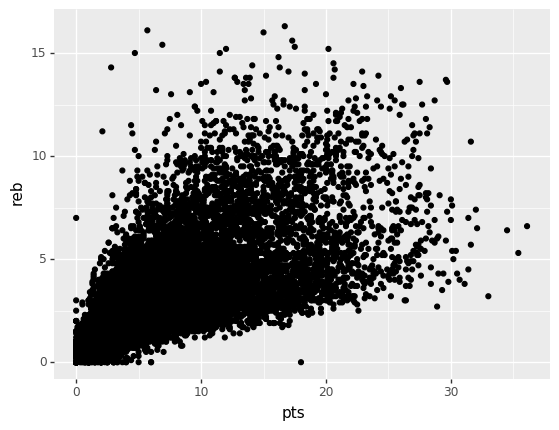

<ggplot: (7551953441)>

In [68]:
(ggplot(data, aes(x = "pts", y = "reb")) 
 + geom_point())

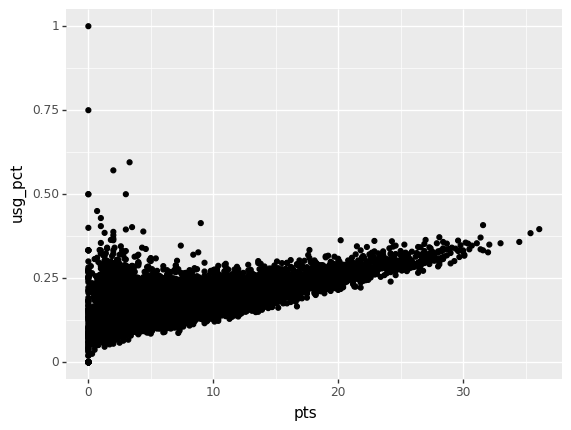

<ggplot: (7551883057)>

In [69]:
(ggplot(data, aes(x = "pts", y = "usg_pct")) 
 + geom_point())

# Question 2: 
## What is the performance of players like based on their draft round?

The reason why I changed draft numbers to draft rounds was because I thought it would be more effective to analyze them by their rounds. Usually those in rounds 1-3 are better than 4-8. 

Draft round 1 players are the most athletic and score the highest amount of rebounds, points, offensive rebounds and assists.

Draft round 2 players are similar to draft round 1 player except they have trade offs, they can't excel ineverything like draft round 1.

Draft round 3 players are likfe daft round 2 players.

Draft rounds 4-8 aren't the best players. 

Undrafted playera have a great amount of potential to be draafted, even though they have trade offs its good to consider drafting them in the future. 

In [82]:
data2 = pd.read_csv("/Users/kksizzle/Desktop/CPSC 392/project_392/all_seasons.csv")

features = predictors = ['player_height', 'player_weight','gp','reb','ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct','pts','age']

X = data2[features]
Xdf = X
    
z = StandardScaler()
X[features] = z.fit_transform(X)


n_components = [2,3,4,5]

sils = {}
for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    colName = str(n) + "assign"
    clusters = gmm.predict(X)
    
    Xdf[colName] = clusters
    
    sils[n] = silhouette_score(X, clusters)
    

    
print(sils)

Xdf["draft_round"] = data2["draft_round"]

{2: 0.17068067759874753, 3: 0.1877844559749856, 4: 0.2263524314780665, 5: 0.2437710593581459}


Based on the silhouette score I decided to go with 5 clusters. 

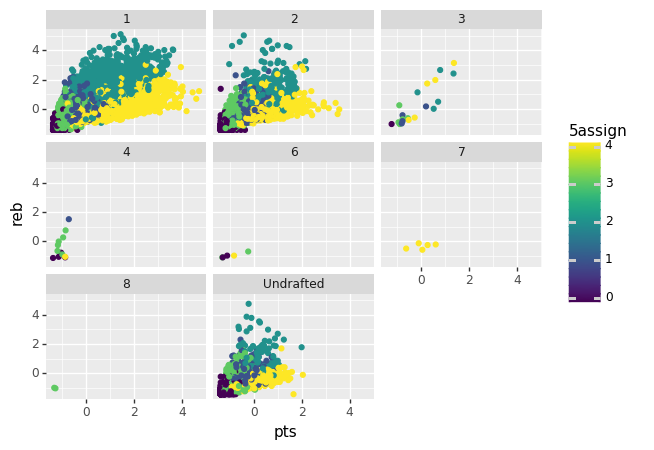

<ggplot: (7548246953)>

In [80]:
(ggplot(Xdf, aes(x = "pts", y = "reb", color = "5assign")) 
 + geom_point() 
 + facet_wrap(["draft_round"]))

Draft 1: majority of players are cluster blue-green and yellow which have a high amount of rebounds and points. 

Draft 2: draft round 2 has the most even spread of clusters, but is mostly made up of players with a high amount of rebounds and points.

Draft 3: draft round 3 is mostly made of clusters blue-green and yellow. 

Draft 4: is made up of mostly cluster green which has players that dont score many points but get a lot of rebounds

Draft 5-8: very thin, not dense at all

Undrafted: is pretty dense, a very good mix between all of the clusters. 

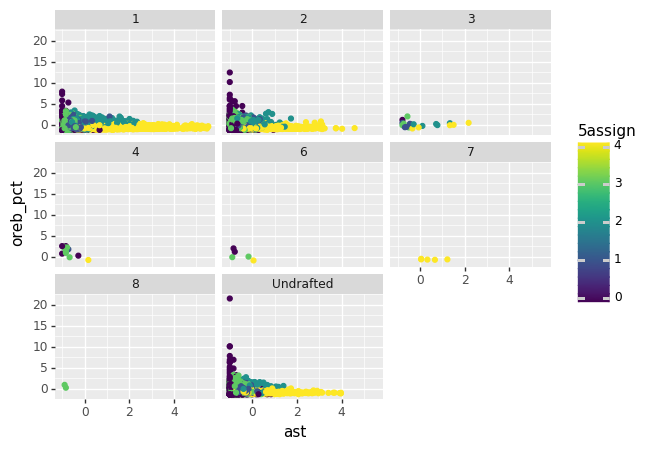

<ggplot: (7548164045)>

In [62]:
(ggplot(Xdf, aes(x = "ast", y = "oreb_pct", color = "5assign")) 
 + geom_point() 
 + facet_wrap(["draft_round"]))

Draft 1: majority of players are cluster blue-green and yellow which have a low amount of offensive rebounds and high amount of assists. 

Draft 2: is mostly made up of clutser purple, high offensive rebounds/low assists, and cluster yellow, low offensive rebounds/high assists.

Draft 3: draft round 3 , is mostly made of clusters blue-green and yellow. 

Draft 4: is made up of mostly cluster green which has players that dont score many points but get a lot of rebounds

Draft 5-8: very thin, not dense at all

Undrafted: Undrafted has the most even spread of clusters, is pretty dense, and has a very good mix between all of the clusters. 

# Question 3: 
## Does age affect a players performance?

I thought it was best to change the question and model for question 3. The new question works great for helping decided which future players to draft. If they are young then they have a lot of potential to grow, and if they're a bit older then they're more likely to be in their prime ebcause they have the growth, skill, and experience.

Age does affect a players performance. You can see that as a player gets older the start to scoer higher points and rebounds, this means that they are probably gaining more experience and overall becoming a batter basketball player as they get older because of all the practice.

In [51]:
# Ridge
features = ['player_height', 'player_weight','gp','reb','ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct','pts']

X = data[features]
y = data["age"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[features] = z.fit_transform(X_train[features])
X_test[features] = z.transform(X_test[features])

X_train.head()

rr_tune = RidgeCV(cv = 5).fit(X_train,y_train)

print("TRAIN RMSE: ", mean_absolute_error(y_train, rr_tune.predict(X_train)))
print("TEST RMSE: ", mean_absolute_error(y_test, rr_tune.predict(X_test)))

print("\nChosen alpha: " + str(rr_tune.alpha_))

TRAIN RMSE:  3.4117588099050997
TEST RMSE:  3.421991226975143

Chosen alpha: 10.0


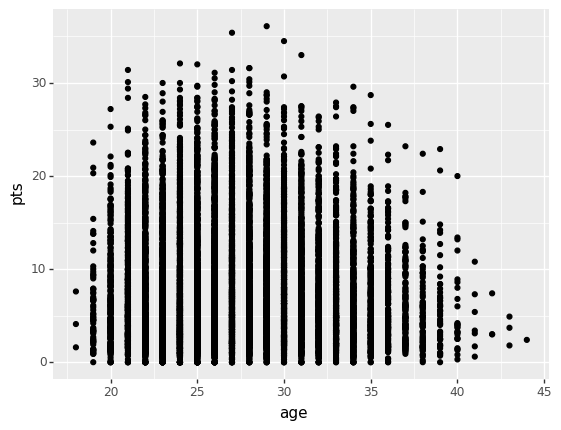

<ggplot: (7551967585)>

In [92]:
(ggplot(data, aes(x = "age", y = "pts")) 
 + geom_point())

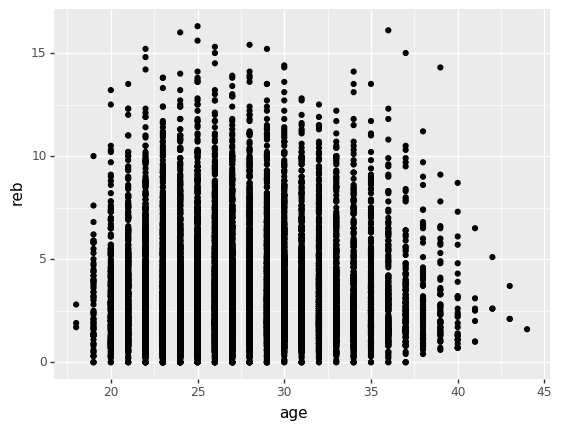

<ggplot: (7547558141)>

In [91]:
(ggplot(data, aes(x = "age", y = "reb")) 
 + geom_point())